In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path =  'ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


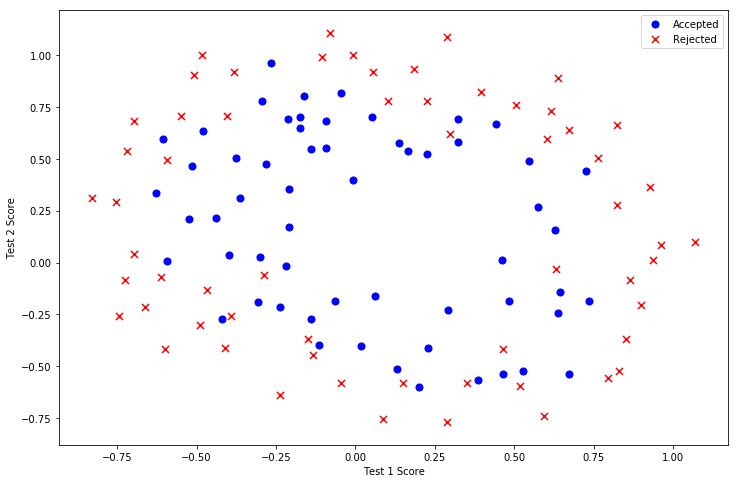

In [3]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [4]:
def mapFeature(degree, data2):
    for i in range(0, degree):
        for j in range(0, i + 1):
            data2['F' + str(i) + str(j)] = np.power(data2['Test 1'], i-j) * np.power(data2['Test 2'], j)

In [5]:
mapFeature(7, data2)
data2.head()

,Test 1,Test 2,Accepted,F00,F10,F11,F20,F21,F22,F30,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,0.051267,0.69956,1,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,-0.092742,0.68494,1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,-0.213710,0.69225,1,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,-0.375000,0.50219,1,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,-0.513250,0.46564,1,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [6]:
y = data2.iloc[:, 2]

In [7]:
X = data2.iloc[:, 3:]

In [8]:
X.head()

,F00,F10,F11,F20,F21,F22,F30,F31,F32,F33,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
def cost(theta, X, y, lambd):
    m = X.shape[0]
    h = sigmoid(X @ theta)
    first = -y @ np.log(h)
    second = (1 - y) @ np.log(1 - h)
    reg = theta @ theta - theta[0] * theta[0]
    return (first - second)/m + lambd * reg/(2 * m)

In [11]:
def gradient(theta, X, y, lambd):
    m = X.shape[0]
    h = sigmoid(X @ theta)
    grad = (X.T @ (h - y)) / m  + (lambd * theta)/m
    grad[0] -= (lambd * theta[0])/m 
    return grad

In [13]:
theta = np.zeros(X.shape[1])

In [16]:
import scipy.optimize as opt


res = opt.minimize(cost, x0=theta, args=(X.values, y.values, 1), method='Newton-CG', jac=gradient)
res

     fun: 0.5290027297128395
     jac: array([-4.36750852e-09,  3.49233964e-08,  1.00334868e-07,  2.12894783e-08,
       -2.36041672e-10, -2.34682082e-08,  3.89678846e-08,  2.65222107e-08,
        1.04319427e-08,  1.04307196e-08, -5.65749293e-09, -5.43285218e-09,
       -3.46980063e-08,  1.11753046e-08, -4.87180970e-08,  2.00152715e-08,
        1.55141079e-08, -1.02850244e-08, -4.12138742e-09,  5.22176590e-09,
       -2.13914045e-08, -7.20754712e-09,  1.44538759e-09, -1.21338338e-08,
       -5.82639178e-09, -1.23572601e-08,  3.21308992e-09, -5.51641908e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 66
  status: 0
 success: True
       x: array([ 1.27274049,  0.62527112,  1.18108869, -2.0199604 , -0.91742504,
       -1.4316637 ,  0.1240074 , -0.36553395, -0.35723903, -0.17513041,
       -1.4581579 , -0.05098995, -0.61555777, -0.27470634, -1.19281746,
       -0.24218794, -0.20600551, -0.04473169, -0.27778515, -0.29537795,
       -0.4

In [18]:
t1 = np.linspace(-1, 1.5, 1000)
t2 = np.linspace(-1, 1.5, 1000)
cordinates = [(x, y) for x in t1 for y in t2]

In [20]:
type(cordinates)

list

In [22]:
x_cord, y_cord = zip(*cordinates)

In [28]:
df = pd.DataFrame({'Test 1':x_cord, 'Test 2':y_cord})

In [29]:
df.shape

(1000000, 2)

In [30]:
df.head()

,Test 1,Test 2
0,-1.0,-1.000000
1,-1.0,-0.997497
2,-1.0,-0.994995
3,-1.0,-0.992492
4,-1.0,-0.989990


In [31]:
mapFeature(7, df)
df.head()

,Test 1,Test 2,F00,F10,F11,F20,F21,F22,F30,F31,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,-1.0,-1.000000,1.0,-1.0,-1.000000,1.0,1.000000,1.000000,-1.0,-1.000000,...,-1.000000,-1.000000,-1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-1.0,-0.997497,1.0,-1.0,-0.997497,1.0,0.997497,0.995001,-1.0,-0.997497,...,-0.992511,-0.990028,-0.987550,1.0,0.997497,0.995001,0.992511,0.990028,0.987550,0.985079
2,-1.0,-0.994995,1.0,-1.0,-0.994995,1.0,0.994995,0.990015,-1.0,-0.994995,...,-0.985060,-0.980130,-0.975224,1.0,0.994995,0.990015,0.985060,0.980130,0.975224,0.970343
3,-1.0,-0.992492,1.0,-1.0,-0.992492,1.0,0.992492,0.985041,-1.0,-0.992492,...,-0.977646,-0.970306,-0.963022,1.0,0.992492,0.985041,0.977646,0.970306,0.963022,0.955792
4,-1.0,-0.989990,1.0,-1.0,-0.989990,1.0,0.989990,0.980080,-1.0,-0.989990,...,-0.970270,-0.960557,-0.950942,1.0,0.989990,0.980080,0.970270,0.960557,0.950942,0.941423


In [33]:
df = df.iloc[:,3:]

In [34]:
df.head()

,F10,F11,F20,F21,F22,F30,F31,F32,F33,F40,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,-1.0,-1.000000,1.0,1.000000,1.000000,-1.0,-1.000000,-1.000000,-1.000000,1.0,...,-1.000000,-1.000000,-1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-1.0,-0.997497,1.0,0.997497,0.995001,-1.0,-0.997497,-0.995001,-0.992511,1.0,...,-0.992511,-0.990028,-0.987550,1.0,0.997497,0.995001,0.992511,0.990028,0.987550,0.985079
2,-1.0,-0.994995,1.0,0.994995,0.990015,-1.0,-0.994995,-0.990015,-0.985060,1.0,...,-0.985060,-0.980130,-0.975224,1.0,0.994995,0.990015,0.985060,0.980130,0.975224,0.970343
3,-1.0,-0.992492,1.0,0.992492,0.985041,-1.0,-0.992492,-0.985041,-0.977646,1.0,...,-0.977646,-0.970306,-0.963022,1.0,0.992492,0.985041,0.977646,0.970306,0.963022,0.955792
4,-1.0,-0.989990,1.0,0.989990,0.980080,-1.0,-0.989990,-0.980080,-0.970270,1.0,...,-0.970270,-0.960557,-0.950942,1.0,0.989990,0.980080,0.970270,0.960557,0.950942,0.941423


In [35]:
df.insert(0, 'F00', 1)

In [36]:
df.head()

,F00,F10,F11,F20,F21,F22,F30,F31,F32,F33,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,1,-1.0,-1.000000,1.0,1.000000,1.000000,-1.0,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,-1.0,-0.997497,1.0,0.997497,0.995001,-1.0,-0.997497,-0.995001,-0.992511,...,-0.992511,-0.990028,-0.987550,1.0,0.997497,0.995001,0.992511,0.990028,0.987550,0.985079
2,1,-1.0,-0.994995,1.0,0.994995,0.990015,-1.0,-0.994995,-0.990015,-0.985060,...,-0.985060,-0.980130,-0.975224,1.0,0.994995,0.990015,0.985060,0.980130,0.975224,0.970343
3,1,-1.0,-0.992492,1.0,0.992492,0.985041,-1.0,-0.992492,-0.985041,-0.977646,...,-0.977646,-0.970306,-0.963022,1.0,0.992492,0.985041,0.977646,0.970306,0.963022,0.955792
4,1,-1.0,-0.989990,1.0,0.989990,0.980080,-1.0,-0.989990,-0.980080,-0.970270,...,-0.970270,-0.960557,-0.950942,1.0,0.989990,0.980080,0.970270,0.960557,0.950942,0.941423


In [37]:
threshhold = 2 * 10**-3
inner_product = df.values @ theta 
decision = df[np.abs(inner_product) < threshhold]

In [42]:
inner_product = df.values @ res.x 

In [43]:
inner_product

array([ -8.88677605,  -8.85254048,  -8.81854664, ..., -68.25014459,
       -68.53784148, -68.82722221])

In [44]:
res.x 

array([ 1.27274049,  0.62527112,  1.18108869, -2.0199604 , -0.91742504,
       -1.4316637 ,  0.1240074 , -0.36553395, -0.35723903, -0.17513041,
       -1.4581579 , -0.05098995, -0.61555777, -0.27470634, -1.19281746,
       -0.24218794, -0.20600551, -0.04473169, -0.27778515, -0.29537795,
       -0.45635773, -1.04320383,  0.02777159, -0.29243234,  0.0155661 ,
       -0.32738037, -0.14388733, -0.92465394])

In [45]:
decision = df[np.abs(inner_product) < threshhold]

In [46]:
decision.head()

,F00,F10,F11,F20,F21,F22,F30,F31,F32,F33,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
139530,1,-0.652152,0.326326,0.425302,-0.212814,0.106489,-0.277362,0.138787,-0.069447,0.034750,...,0.014779,-0.007395,0.003701,0.07693,-0.038494,0.019262,-0.009638,0.004823,-0.002413,0.001208
139531,1,-0.652152,0.328829,0.425302,-0.214446,0.108128,-0.277362,0.139852,-0.070516,0.035556,...,0.015122,-0.007625,0.003845,0.07693,-0.038790,0.019558,-0.009862,0.004973,-0.002507,0.001264
139532,1,-0.652152,0.331331,0.425302,-0.216078,0.109780,-0.277362,0.140916,-0.071594,0.036374,...,0.015470,-0.007860,0.003993,0.07693,-0.039085,0.019857,-0.010089,0.005126,-0.002604,0.001323
139533,1,-0.652152,0.333834,0.425302,-0.217710,0.111445,-0.277362,0.141980,-0.072679,0.037204,...,0.015823,-0.008100,0.004146,0.07693,-0.039380,0.020158,-0.010319,0.005282,-0.002704,0.001384
139534,1,-0.652152,0.336336,0.425302,-0.219342,0.113122,-0.277362,0.143045,-0.073773,0.038047,...,0.016182,-0.008345,0.004304,0.07693,-0.039675,0.020462,-0.010553,0.005442,-0.002807,0.001448


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


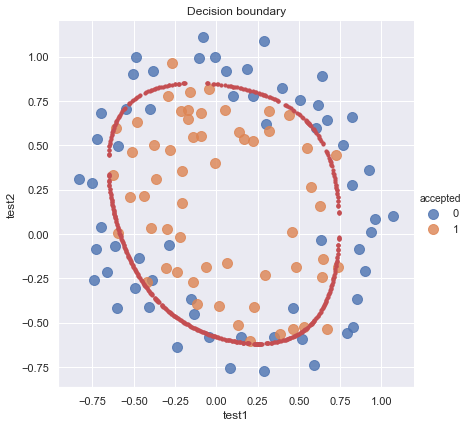

In [52]:
import seaborn as sns
sns.set(context="notebook", style="darkgrid")

x, y = decision['F10'],  decision['F11']

df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

plt.scatter(x, y, c='R', s=10)
plt.title('Decision boundary')
plt.show()

In [66]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)
    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    df = pd.DataFrame({'Test 1':x_cord, 'Test 2':y_cord})
    mapFeature(power, df)
    df = df.iloc[:,2:]
    inner_product = df.values @ theta 
    decision = df[np.abs(inner_product) < threshhold]
    return decision['F10'],  decision['F11']

In [67]:
def feature_mapped_logistic_regression(power, l):
#     """for drawing purpose only.. not a well generealize logistic regression
#     power: int
#         raise x1, x2 to polynomial power
#     l: int
#         lambda constant for regularization term
#     """
    df = pd.read_csv('ex2data2.txt', names=['Test 1', 'Test 2', 'Accepted'])
    mapFeature(power, df)
    X = df.iloc[:, 3:].values
    y = data2.iloc[:, 2].values
    theta = np.zeros(X.shape[1])
    
    res = opt.minimize(cost, x0=theta, args=(X, y, l), method='Newton-CG', jac=gradient)
    final_theta = res.x

    return final_theta

In [68]:
feature_mapped_logistic_regression(7, 1)

array([ 1.27274049,  0.62527112,  1.18108869, -2.0199604 , -0.91742504,
       -1.4316637 ,  0.1240074 , -0.36553395, -0.35723903, -0.17513041,
       -1.4581579 , -0.05098995, -0.61555777, -0.27470634, -1.19281746,
       -0.24218794, -0.20600551, -0.04473169, -0.27778515, -0.29537795,
       -0.45635773, -1.04320383,  0.02777159, -0.29243234,  0.0155661 ,
       -0.32738037, -0.14388733, -0.92465394])

In [71]:
def draw_boundary(power, l):
#     """
#     power: polynomial power for mapped feature
#     l: lambda constant
#     """
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['Test 1', 'Test 2', 'Accepted'])
    sns.lmplot('Test 1', 'Test 2', hue='Accepted', data=df, height=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

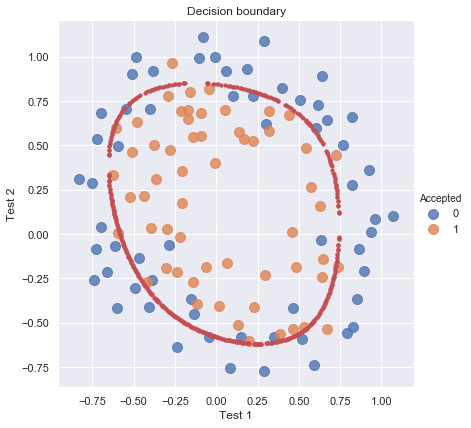

In [72]:
draw_boundary(7,1)

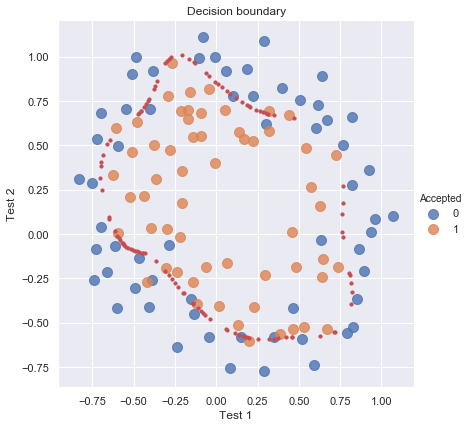

In [73]:
draw_boundary(7,0)

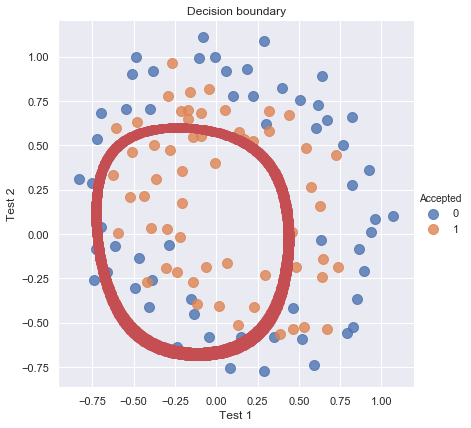

In [74]:
draw_boundary(7,100)